Data Acquisition

In [1]:
# Realizamos la importaciones que necesitaremos a lo largo del proyecto

import numpy as np
import pandas as pd
import re
import seaborn as sns
import argparse


In [2]:
# Importamos el archivo csv

dfApp = pd.read_csv('googleplaystore.csv', encoding = "utf-8")
dfReview = pd.read_csv('googleplaystore_user_reviews.csv', encoding = "utf-8")

In [3]:
dfApp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


DATA CLEANING

In [ ]:

dfApp = dfApp.drop_duplicates(subset='App', inplace=True)


In [ ]:
# Comprobación  de medidas de peso de archivo
dfApp.Size.value_counts()
dfApp.Rating.value_counts()
dfApp.App.value_counts()

In [4]:
# No es necesario manipular 'rating'
# Convertmos a MB todas las medidas de 'Size'.

def toMb(x):
    if 'M' in str(x):
        return str(x).replace('M', '')
    elif 'k' in str(x):
        return float(str(x).replace('k', '')) / 1000
    else:
        return str(x).replace('Varies with device', 'NaN')
 


dfApp.head()
dfApp['Size'] = dfApp['Size'].apply(lambda x: toMb(x))

dfApp.loc[(dfApp['Size']== '1,000+', 'Size')] = str(1)
dfApp['Size'] = dfApp['Size'].apply(lambda x: float(x))

In [5]:
#Comprobamos que los datos son del tipo necesario para operar con ellos
dfApp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
#Calculamos la correlación entre las columnas 'Rating' y 'Size'
corrmat = dfApp.corr()
corrmat

,Rating,Size
Rating,1.000000,0.076831
Size,0.076831,1.000000


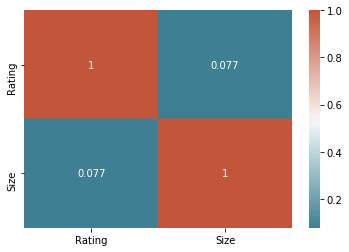

In [12]:
#Partíamos de la hipótesis que el Rating de las Apps estaba relacionado con su Size.
# Aplicamos la correlación entre ambas columnas y comprobamos que la hipótesis es errónea.
# Como refleja el siguiente gráfico:

#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [13]:
# Exporting DataFrame

export = dfApp.to_csv('../output/dfApp.csv', index=False)
